# Notebook Imports

In [95]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data
[Source: Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data points and features

In [6]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston_dataset.data.shape  # chaining dot notation

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# Actual prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Data Exploration with Pandas dataframes

In [10]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

# Add column with the price(target)
data['PRICE'] = boston_dataset.target

In [11]:
data.head() # The top rows look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.tail() # Rows at bottom of dataframe look like this

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
data.count() # show us the number of row

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data- check for missing values

In [14]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Visualising Data - Histograms,Distributions and Bar Charts

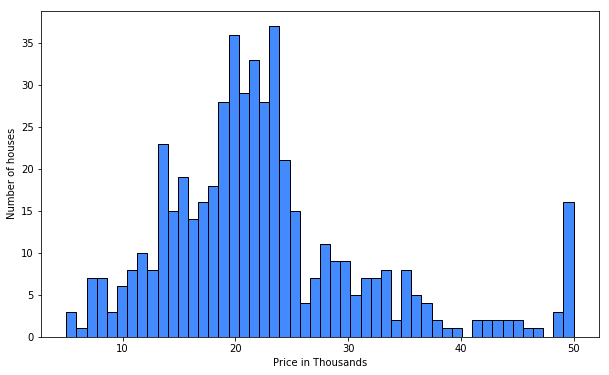

In [16]:
plt.figure(figsize=[10,6])
plt.hist(data['PRICE'],bins=50,ec='black',color='#448aff')
plt.xlabel('Price in Thousands')
plt.ylabel('Number of houses')
plt.show()

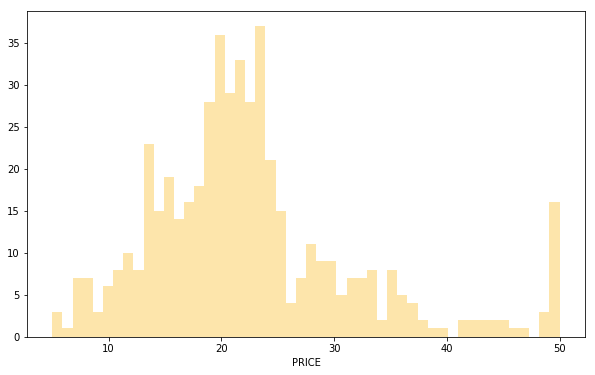

In [17]:
plt.figure(figsize=[10,6])
sns.distplot(data['PRICE'],bins=50,hist=True,kde=False,color='#fbc02d') 
#Curve we see here is Probablity distribution function(PDF)
plt.show()

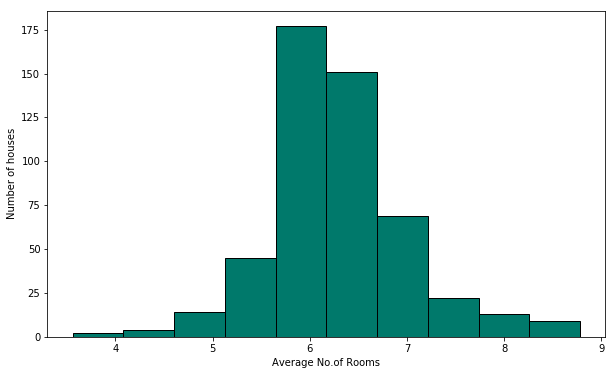

In [18]:
plt.figure(figsize=[10,6])
plt.hist(data['RM'],ec='black',color='#00796B')
plt.xlabel('Average No.of Rooms')
plt.ylabel('Number of houses')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351779

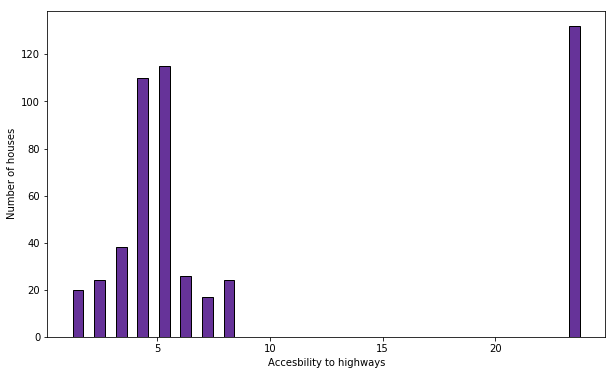

In [20]:
plt.figure(figsize=[10,6])
plt.hist(data['RAD'],bins=24,ec='black',color='#663399',rwidth=0.5)
plt.xlabel('Accesbility to highways')
plt.ylabel('Number of houses')
plt.show()

In [21]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

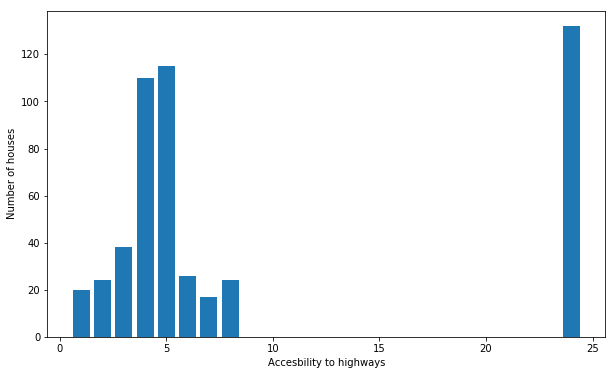

In [22]:
frequency = data['RAD'].value_counts()
#frequency.index
#frequency.axes[0]
plt.figure(figsize=[10,6])
plt.xlabel('Accesbility to highways')
plt.ylabel('Number of houses')

plt.bar(frequency.index,height=frequency)
plt.show()

In [23]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [24]:
data['PRICE'].min()

5.0

In [25]:
data['PRICE'].max()

50.0

In [26]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [27]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [28]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [29]:
data['PRICE'].corr(data['RM'])

0.6953599470715396

In [30]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375618

In [31]:
data.corr() # Pearson Coorelation Coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [32]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

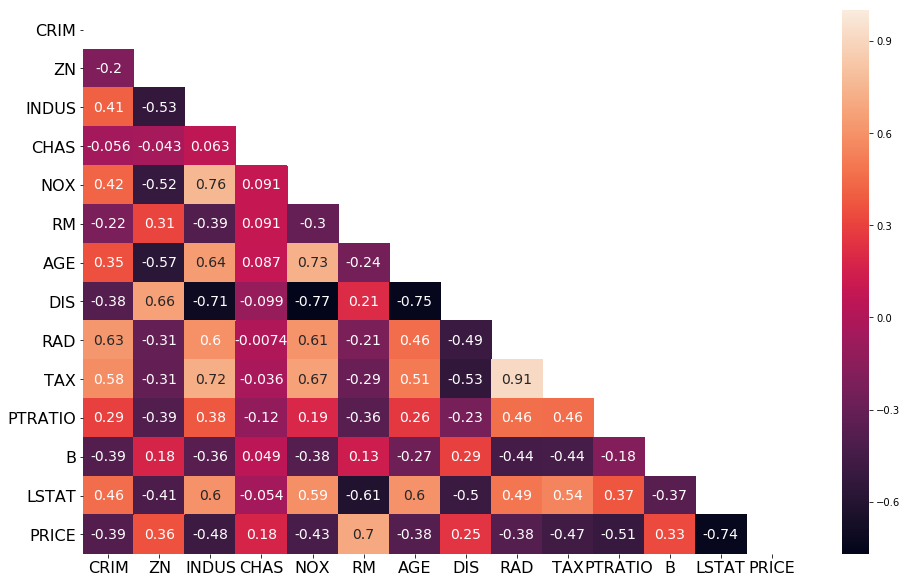

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14}) #mask is our variable
#sns.set_style('white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

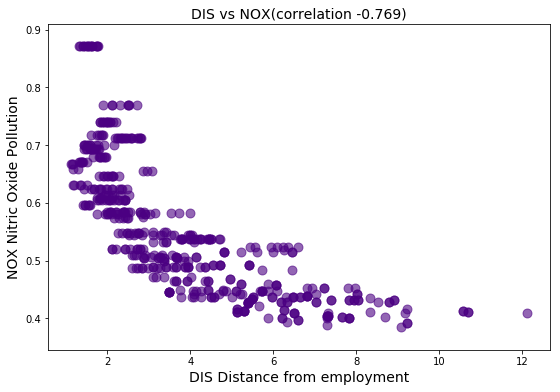

In [34]:
#DIS Distance of houses from the employment centers
#NOX is a measure of pollution

nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=0.6,s=80,color='indigo')
plt.title(f'DIS vs NOX(correlation {nox_dis_corr})',fontsize=14)
plt.xlabel('DIS Distance from employment',fontsize=14)
plt.ylabel('NOX Nitric Oxide Pollution',fontsize=14)
plt.show()


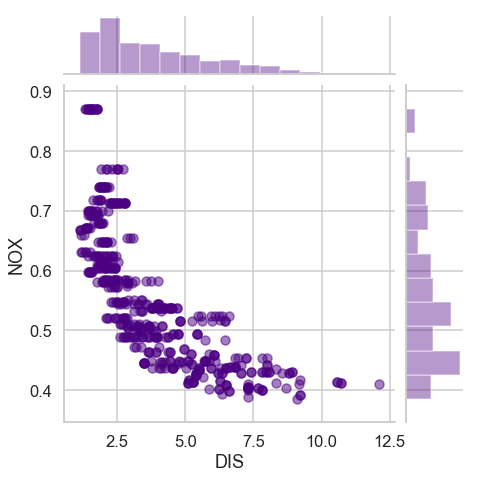

In [35]:
sns.set() #Reset all the styling changes we have made earlier in seaborn
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7,color='indigo',joint_kws={'alpha':0.5})
plt.show()

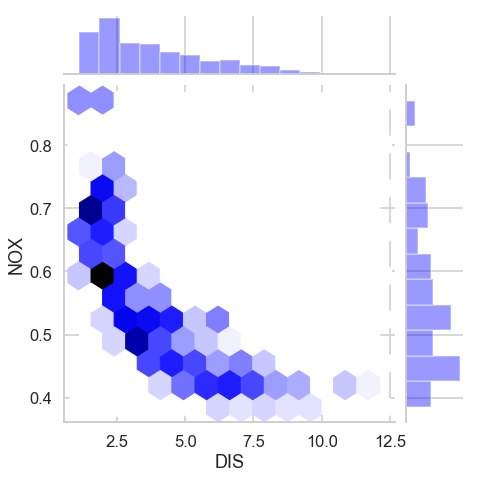

In [36]:
sns.set() #Reset all the styling changes we have made earlier in seaborn
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],kind='hex',height=7,color='blue')
plt.show()

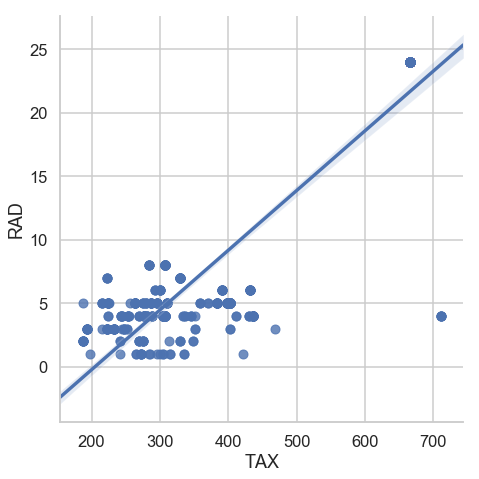

In [37]:
sns.lmplot(x='TAX',y='RAD',data=data,height=7)
plt.show()

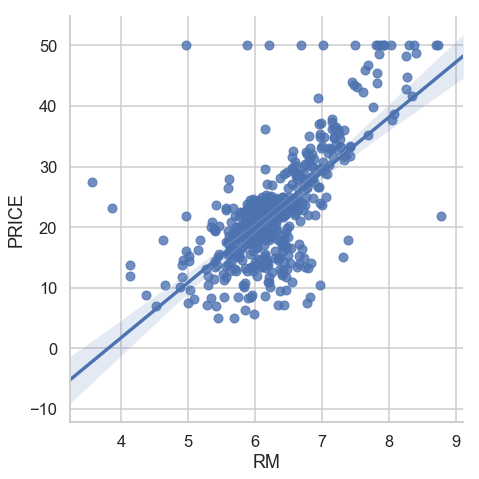

In [38]:
sns.lmplot(x='RM',y='PRICE',data=data,height=7)
plt.show()

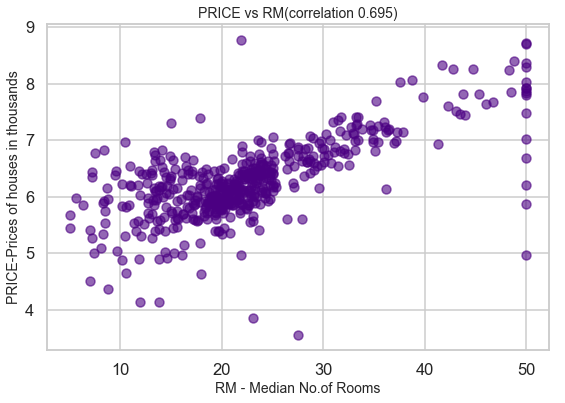

In [39]:
rm_dis_corr = round(data['RM'].corr(data['PRICE']),3)
plt.figure(figsize=(9,6))
plt.scatter(x=data['PRICE'],y=data['RM'],alpha=0.6,s=80,color='indigo')
plt.title(f'PRICE vs RM(correlation {rm_dis_corr})',fontsize=14)
plt.xlabel('RM - Median No.of Rooms',fontsize=14)
plt.ylabel('PRICE-Prices of houses in thousands',fontsize=14)
plt.show()


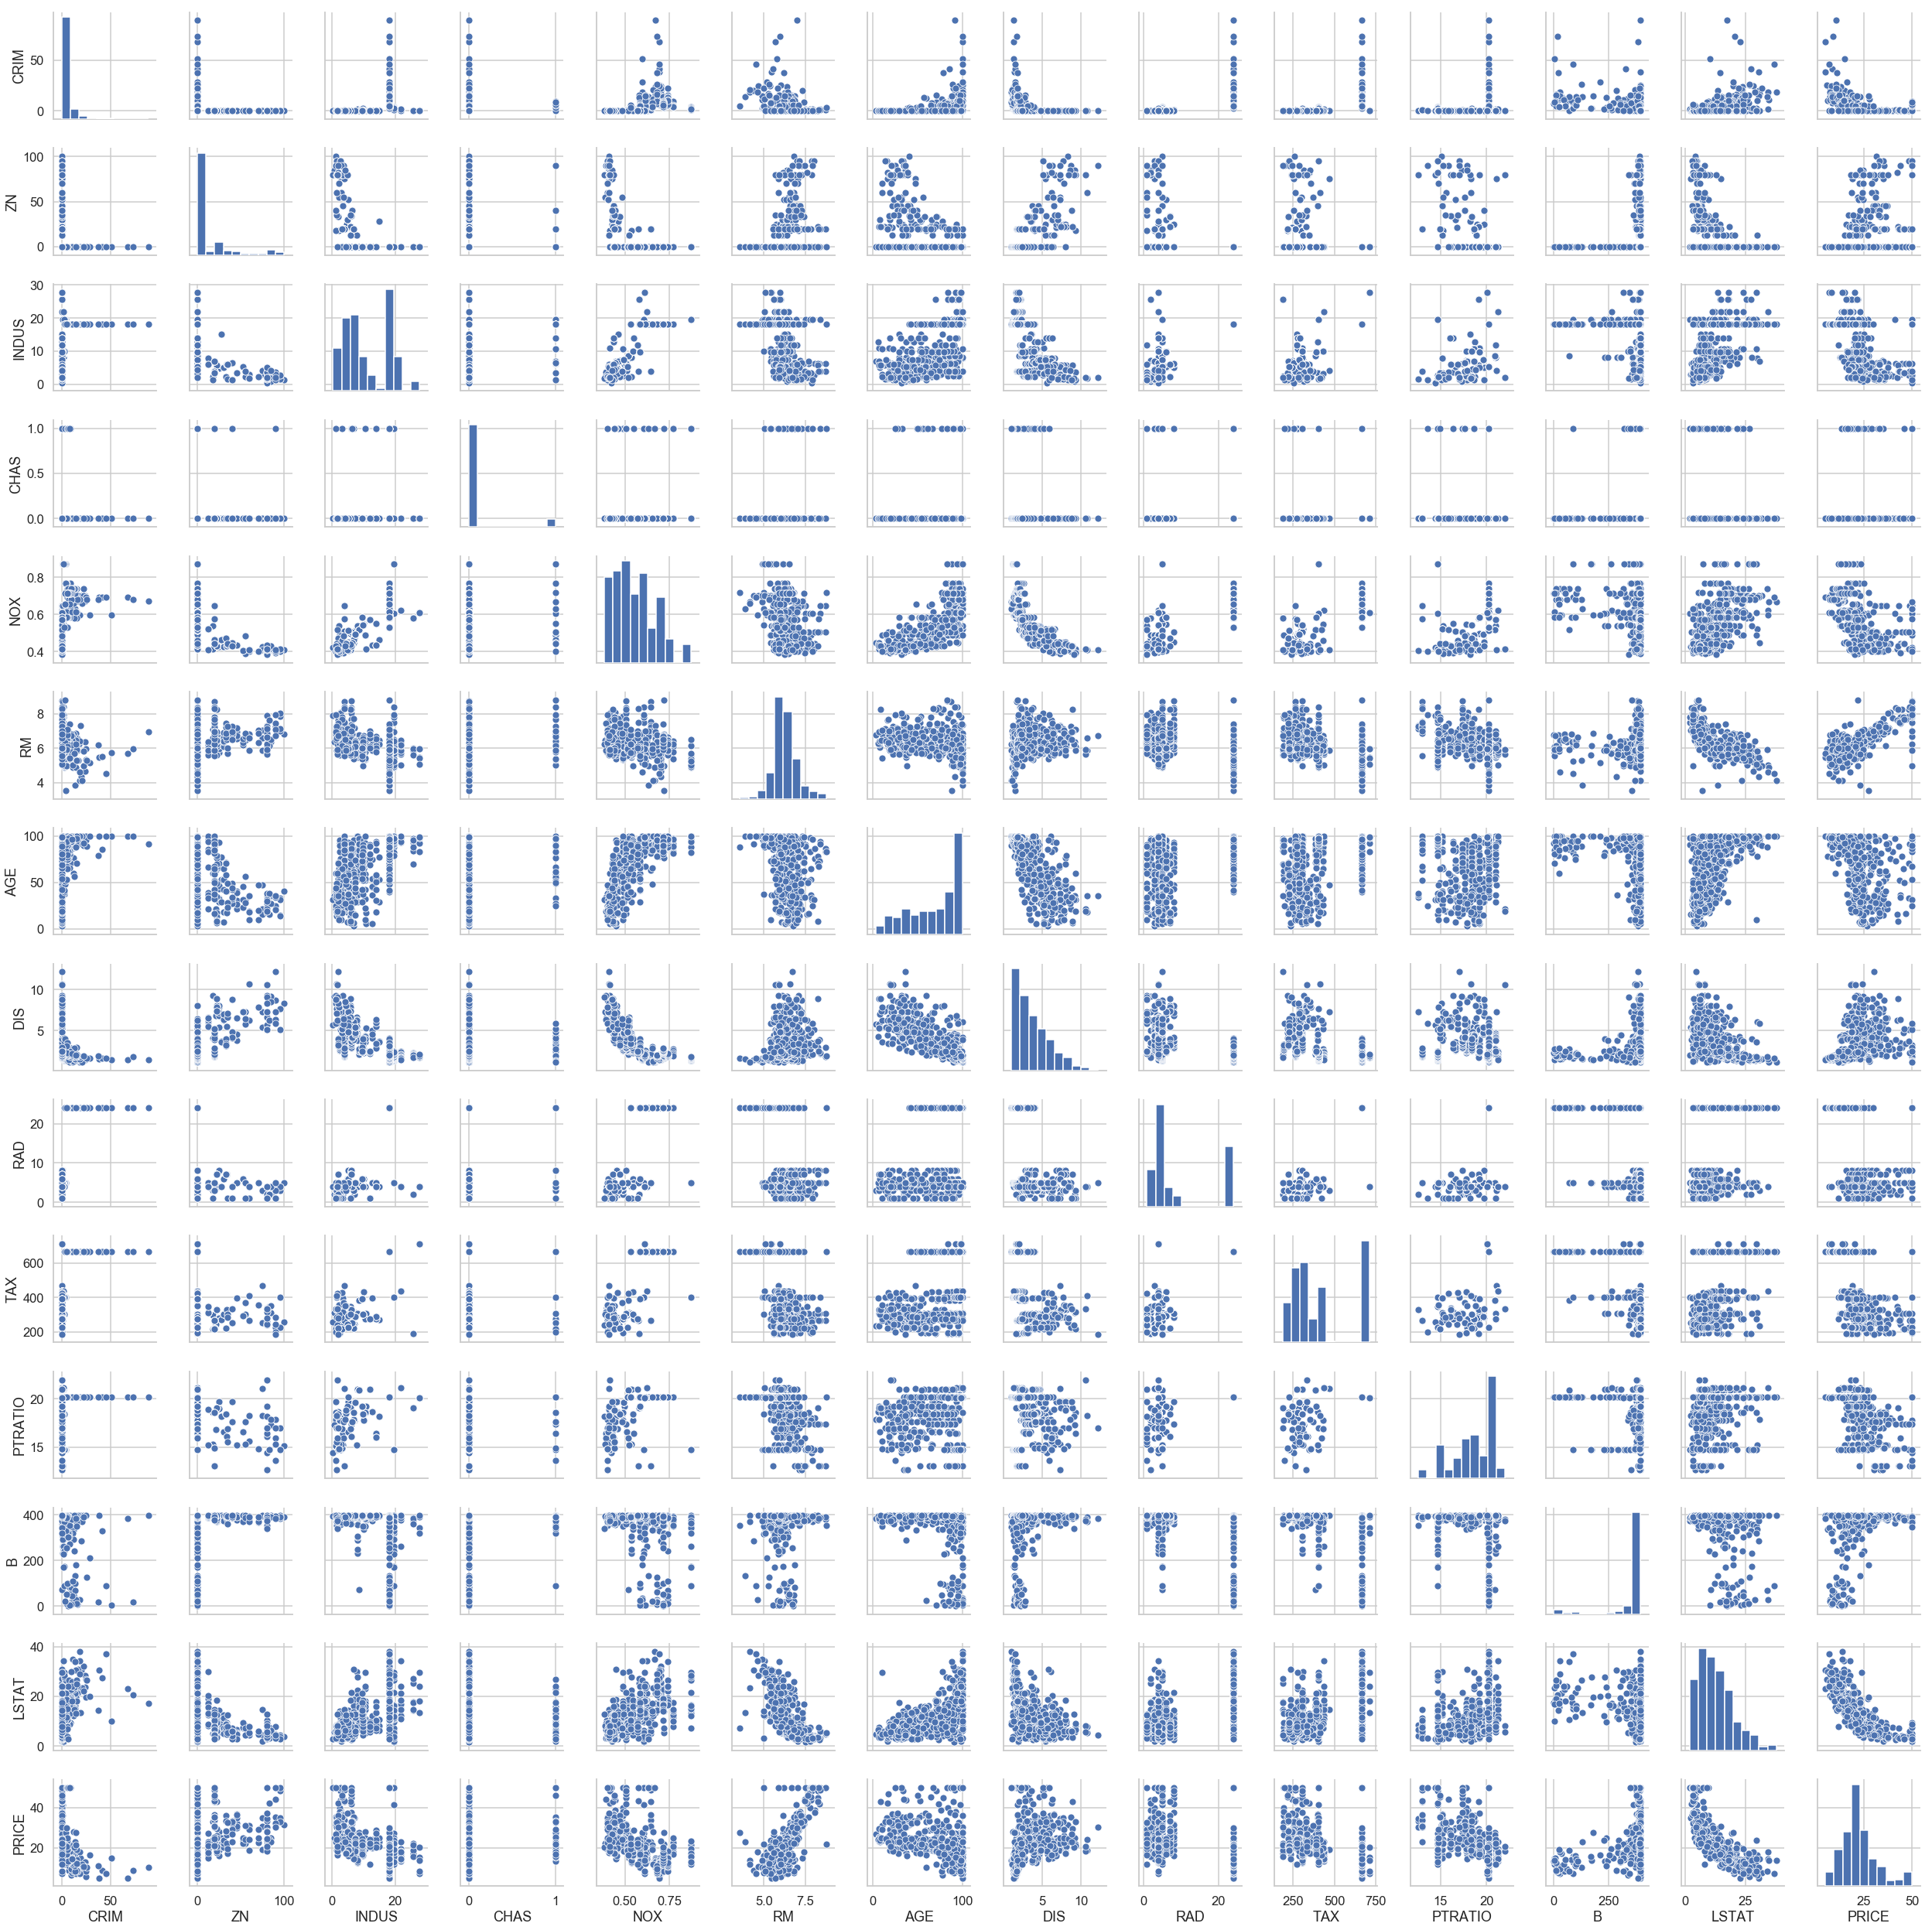

Wall time: 57.5 s


In [42]:
%%time 
#It helps you to run all the long process in the short time
sns.pairplot(data)
plt.show()

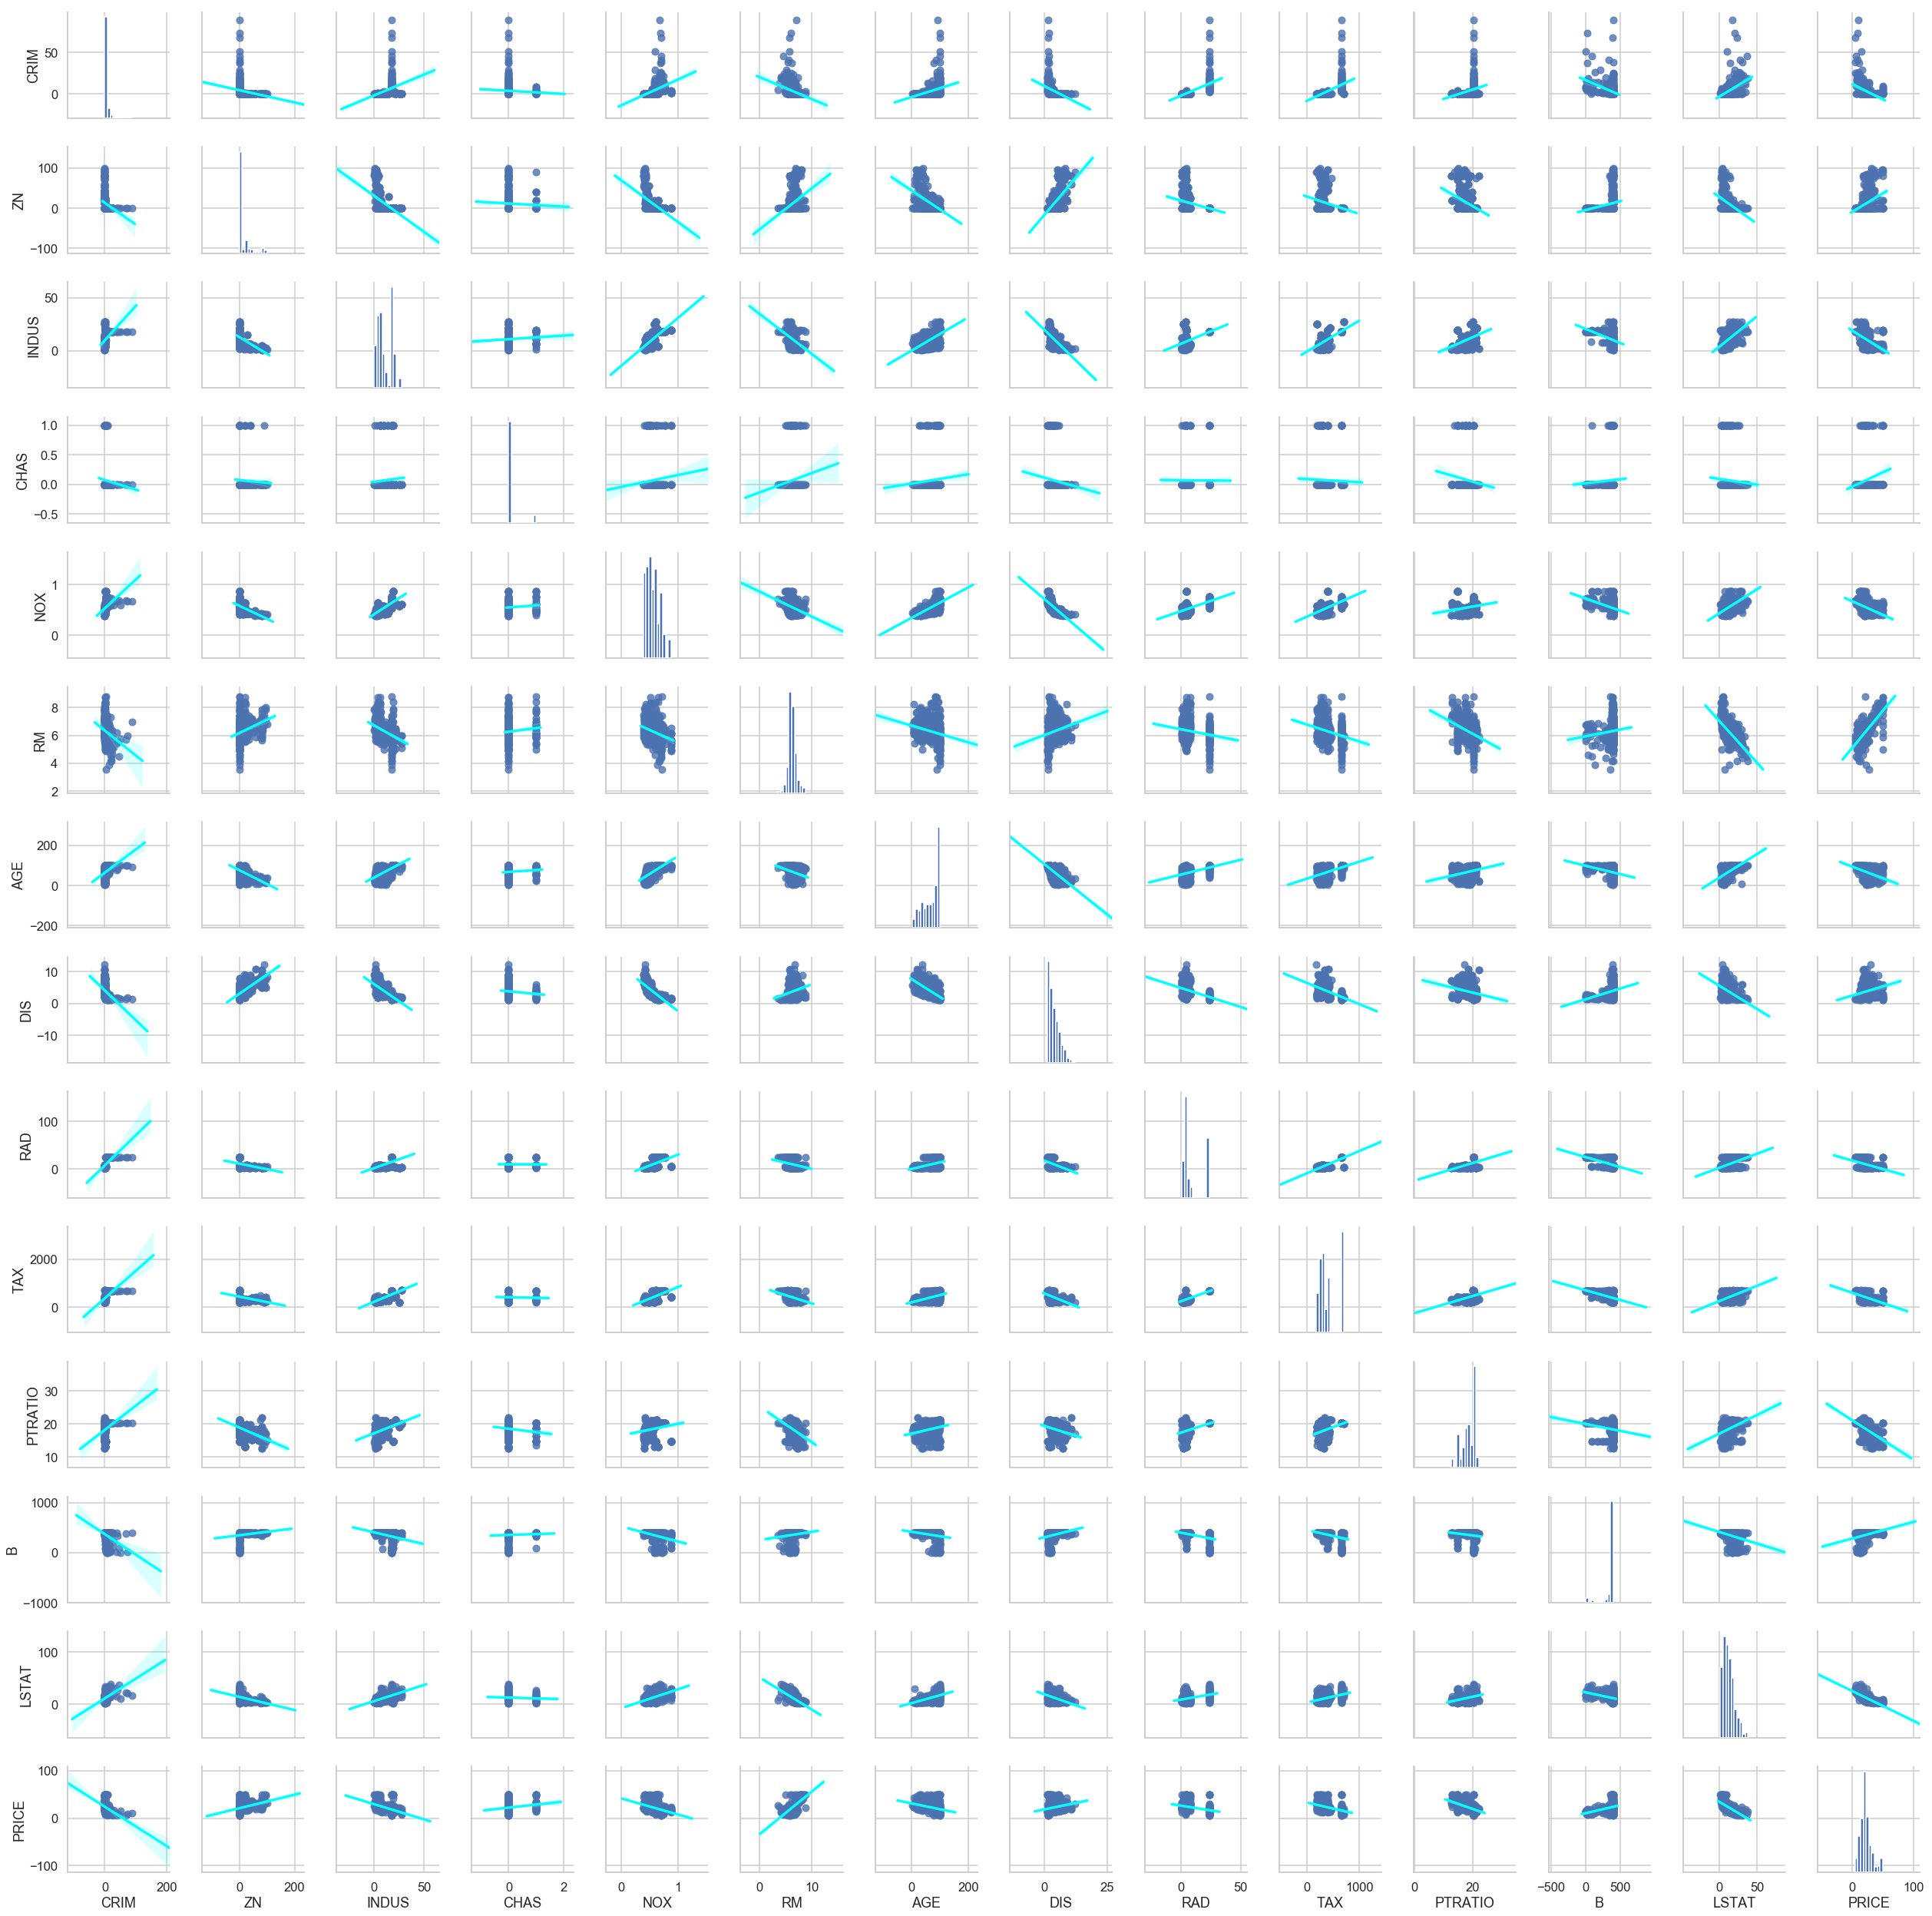

Wall time: 1min 20s


In [44]:
%%time
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training & Test Dataset Split

In [52]:
prices = data['PRICE']
features = data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices
                                                 ,test_size=0.2,random_state=10)

# % of training set
len(X_train)/len(features)

0.7984189723320159

In [53]:
# % of test data
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [61]:
regr = LinearRegression()
regr.fit(X_train,y_train)



print('Training data r-squared:',regr.score(X_train,y_train))
print('Test data r-squared:',regr.score(X_test,y_test))

print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115636
Intercept 36.53305138282418


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [62]:
data['PRICE'].skew()

1.1080984082549072

In [68]:
y_log = np.log(data['PRICE'])
y_log.skew()

-0.33032129530987864

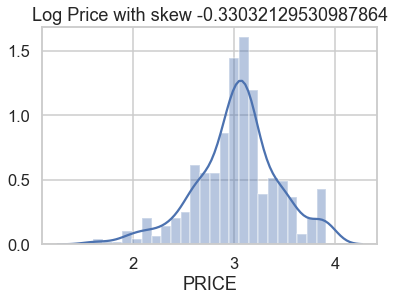

In [72]:
sns.distplot(y_log)
plt.title(f'Log Price with skew {y_log.skew()}')
plt.show()

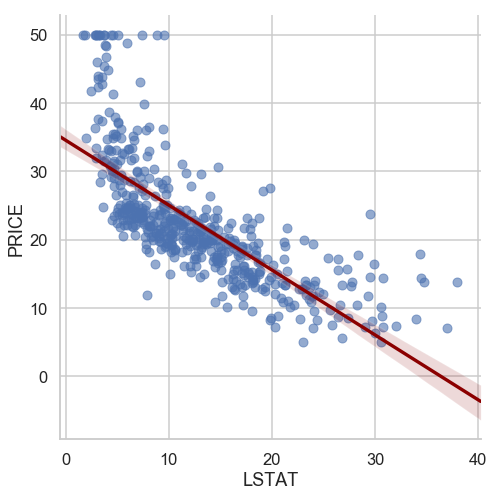

In [76]:
sns.lmplot(x='LSTAT',y='PRICE',data=data,height=7,
           scatter_kws={'alpha':0.6},line_kws={'color':'darkred'})
plt.show()

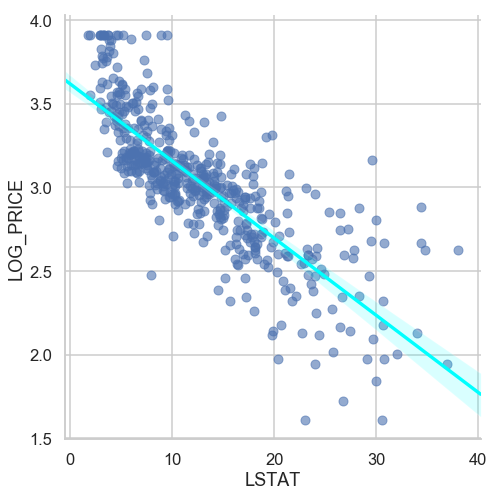

In [79]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log
sns.lmplot(x='LSTAT',y='LOG_PRICE',data=transformed_data,height=7,
           scatter_kws={'alpha':0.6},line_kws={'color':'cyan'})
plt.show()

## Regression Using Log Prices

In [81]:
prices = np.log(data['PRICE'])  #Use Log Prices
features = data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices
                                                 ,test_size=0.2,random_state=10)

regr = LinearRegression()
regr.fit(X_train,y_train)



print('Training data r-squared:',regr.score(X_train,y_train))
print('Test data r-squared:',regr.score(X_test,y_test))

print('Intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])

Training data r-squared: 0.7930234826697584
Test data r-squared: 0.7446922306260724
Intercept 4.059943871775182


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [82]:
# Charles River Property Premimum
np.e**0.080475

1.0838017512597784

## p values & Evaluating Coefficients

In [93]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_const) #OLS ordinary least square

results = model.fit()

#results.params

#results.pvalues

pd.DataFrame({'coef': results.params,'p-value':round(results.pvalues,3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity



$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + .... + \alpha_{12}LSTAT $$

$$ VIF_{TAX} = \frac{1}{(1 - R_{TAX}^2)} $$

In [99]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)


1.7145250443932485

In [107]:
print(len(X_incl_const.columns))
X_incl_const.shape[1]

14


14

In [110]:
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))
print('All done!')

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674636
1.0788133385000576
4.410320817897635
1.8404053075678573
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.338671325536472
2.812544292793036
All done!


In [111]:
vif = [] #empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values,exog_idx=i))


In [115]:
vif = [variance_inflation_factor(exog=X_incl_const.values,exog_idx=i)
       for i in range(X_incl_const.shape[1])] #empty list

pd.DataFrame({'coef_name':X_incl_const.columns,'vif': np.around(vif,2)})


,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [116]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Model Simplification and the BIC

In [129]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const) 
results = model.fit()
org_coef = pd.DataFrame({'coef': results.params,
                         'p-value':round(results.pvalues,3)})


print('BIC is',results.bic)
print('r-squared is',results.rsquared)

BIC is -139.74997769478898
r-squared is 0.7930234826697584


In [131]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'],axis=1)
model = sm.OLS(y_train,X_incl_const) 
results = model.fit()
coef_minus_indus = pd.DataFrame({'coef': results.params,
                         'p-value':round(results.pvalues,3)})


print('BIC is',results.bic)
print('r-squared is',results.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [133]:
# Reduced model #2 excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'],axis=1)
model = sm.OLS(y_train,X_incl_const) 
results = model.fit()
reduced_coef = pd.DataFrame({'coef': results.params,
                         'p-value':round(results.pvalues,3)})


print('BIC is',results.bic)
print('r-squared is',results.rsquared)

BIC is -149.49934294224678
r-squared is 0.7918657661852815


In [135]:
frames = [org_coef,coef_minus_indus,reduced_coef]
pd.concat(frames,axis=1,sort='True')

,coef,p-value,coef,p-value,coef,p-value
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residuals Plots

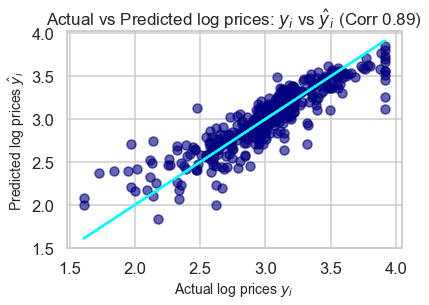

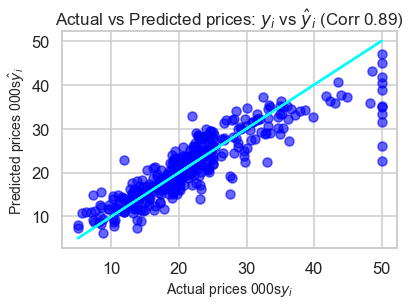

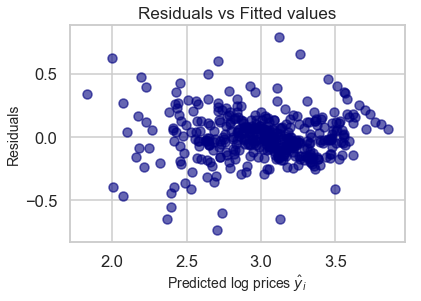

In [180]:
#Modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data['PRICE'])  #Use Log Prices
features = data.drop(['PRICE','INDUS','AGE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices
                                                 ,test_size=0.2,random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const) 
results = model.fit()

# Residuals
#residuals = y_train - results.fittedvalues
#residuals.describe()

#results.resid

#Graph of Actual vs Predicted Prices

corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')

plt.xlabel('Actual log prices $y_i$',fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)

plt.show()

# Actual values vs predicted values in thousands
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,c='blue',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='cyan')

plt.xlabel('Actual prices 000s$y_i$',fontsize=14)
plt.ylabel('Predicted prices 000s$\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues,y=results.resid,c='navy',alpha=0.6)

plt.xlabel('Predicted log prices $\hat y_i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs Fitted values',fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)


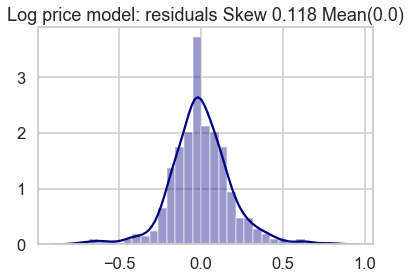

In [168]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)


sns.distplot(results.resid,color='navy')
plt.title(f'Log price model: residuals Skew {(resid_skew)} Mean({resid_mean})')
plt.show()

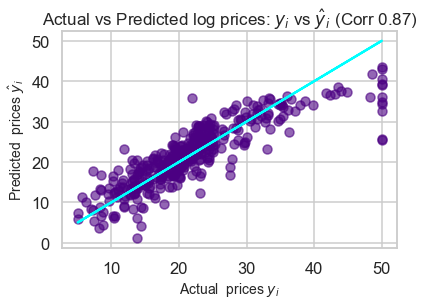

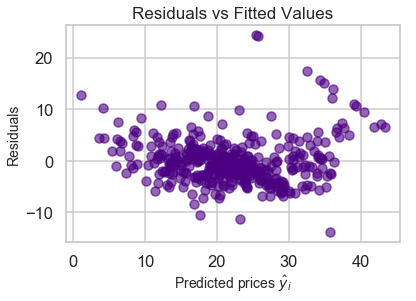

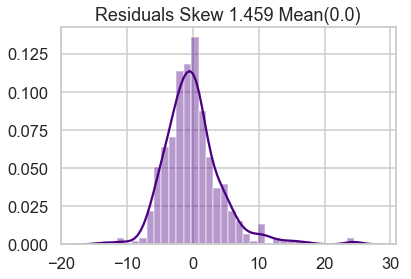

In [181]:
#Original model: normal prices & all features

prices = data['PRICE']
features = data.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices
                                                 ,test_size=0.2,random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const) 
results = model.fit()

#Graph of Actual vs Predicted Prices

corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,c='indigo',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')

plt.xlabel('Actual  prices $y_i$',fontsize=14)
plt.ylabel('Predicted  prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues,y=results.resid,c='indigo',alpha=0.6)

plt.xlabel('Predicted prices $\hat y_i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs Fitted Values',fontsize=17)

plt.show()

# Residual Distriubtion Chart

resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid,color='indigo')
plt.title(f'Residuals Skew {(resid_skew)} Mean({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared,3)

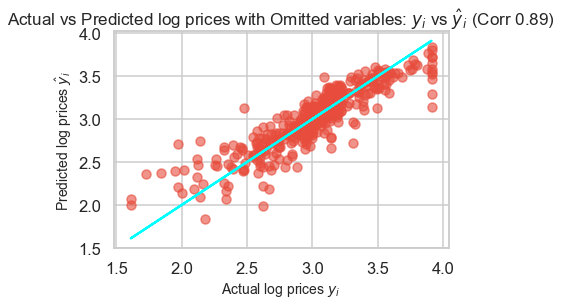

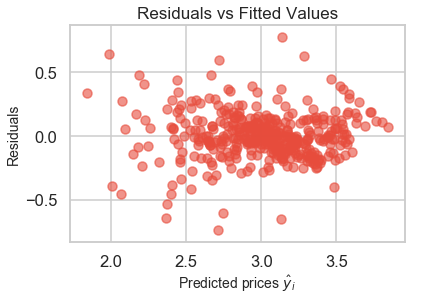

In [186]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(features,prices
                                                 ,test_size=0.2,random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const) 
results = model.fit()

#Graph of Actual vs Predicted Prices

corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(x=y_train,y=results.fittedvalues,c='#e74c3c',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')

plt.xlabel('Actual log prices $y_i$',fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$',fontsize=14)
plt.title(f'Actual vs Predicted log prices with Omitted variables: $y_i$ vs $\hat y_i$ (Corr {corr})',
          fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues,y=results.resid,c='#e74c3c',alpha=0.6)

plt.xlabel('Predicted prices $\hat y_i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals vs Fitted Values',fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared,3)



In [188]:
pd.DataFrame({'R-Squared':[reduced_log_rsquared,full_normal_rsquared,
                           omitted_var_rsquared],
             'MSE':[reduced_log_mse,full_normal_mse,omitted_var_mse],
             'RMSE':np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])},
            index=['Reduced log Model','Full Normal Price Model',
                   'Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.793,0.035,0.187083


In [194]:
print('l.s.d. in log prices is',np.sqrt(reduced_log_mse))
print('l.s.d. in log prices is',2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ',
      upper_bound)
print('The upper bound in normal prices is $',np.e**upper_bound*1000)


lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ',
      lower_bound)
print('The lower bound in normal prices is $',np.e**lower_bound*1000)

l.s.d. in log prices is 0.18708286933869708
l.s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [195]:
3000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 # Wrong! Add first. Transform afterwards

4453.778077746646